## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Please install GPU version of TF


In [2]:
tf.test.gpu_device_name()

''

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [6]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 475 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 264 images belonging to 4 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-15-6ec5a35725ca>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
 3/15 [=====>........................] - ETA: 7:35 - loss: 1.8092 - accuracy: 0.3125

C:\Users\Piyush\anaconda3\lib\site-packages\PIL\Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - 1291s 89s/step - loss: 0.7587 - accuracy: 0.7032 - val_loss: 0.3773 - val_accuracy: 0.9015
Epoch 2/5
15/15 [==============================] - 971s 63s/step - loss: 0.1632 - accuracy: 0.9453 - val_loss: 0.2243 - val_accuracy: 0.9242
Epoch 3/5
15/15 [==============================] - 952s 65s/step - loss: 0.0932 - accuracy: 0.9600 - val_loss: 0.1623 - val_accuracy: 0.9583
Epoch 4/5
15/15 [==============================] - 984s 67s/step - loss: 0.0353 - accuracy: 0.9937 - val_loss: 0.1825 - val_accuracy: 0.9394
Epoch 5/5
15/15 [==============================] - 1031s 67s/step - loss: 0.0204 - accuracy: 0.9979 - val_loss: 0.1480 - val_accuracy: 0.9659


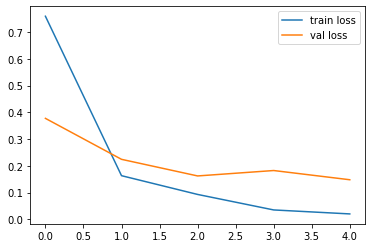

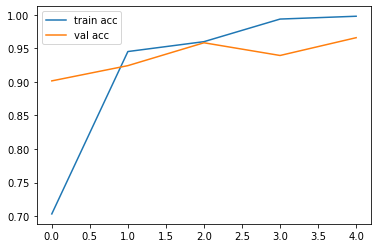

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [18]:

y_pred = model.predict(test_set)


C:\Users\Piyush\anaconda3\lib\site-packages\PIL\Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
y_pred

array([[2.30942806e-03, 4.95454105e-06, 1.16090505e-05, 9.97673929e-01],
       [3.05265280e-06, 4.50961634e-05, 9.99925137e-01, 2.66682891e-05],
       [1.76444388e-04, 4.82699722e-01, 5.16900659e-01, 2.23181734e-04],
       ...,
       [3.93716145e-05, 9.98456359e-01, 1.42256066e-03, 8.16390311e-05],
       [9.58329499e-01, 7.87050638e-04, 9.29597532e-04, 3.99538688e-02],
       [9.99308228e-01, 3.82666825e-04, 1.65100471e-06, 3.07443028e-04]],
      dtype=float32)

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([3, 2, 2, 1, 2, 3, 1, 2, 3, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 3, 0, 0, 2, 3, 1, 1, 1, 0, 0, 0, 3, 0, 1, 2, 0, 3, 3, 2, 2,
       2, 2, 3, 2, 2, 0, 1, 3, 1, 1, 1, 3, 1, 3, 0, 2, 0, 1, 2, 1, 2, 3,
       0, 0, 1, 1, 0, 0, 1, 1, 2, 3, 0, 0, 3, 0, 0, 1, 2, 2, 3, 0, 3, 3,
       2, 3, 1, 0, 1, 0, 2, 1, 3, 1, 0, 3, 2, 1, 3, 0, 3, 3, 2, 1, 1, 3,
       1, 0, 0, 0, 3, 2, 1, 0, 1, 2, 0, 3, 2, 3, 3, 1, 2, 0, 3, 1, 3, 3,
       3, 2, 1, 3, 0, 3, 1, 1, 1, 0, 2, 3, 2, 2, 3, 1, 2, 3, 2, 0, 3, 2,
       2, 3, 0, 3, 3, 2, 0, 0, 0, 3, 2, 3, 1, 3, 2, 2, 0, 0, 1, 1, 3, 1,
       0, 1, 1, 3, 0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 3, 3, 3, 2,
       3, 3, 1, 1, 2, 2, 2, 3, 3, 1, 2, 1, 2, 0, 2, 3, 0, 3, 1, 2, 0, 3,
       2, 2, 1, 0, 3, 1, 1, 1, 0, 3, 2, 2, 3, 0, 3, 2, 3, 0, 3, 3, 2, 3,
       0, 3, 1, 2, 0, 1, 0, 0, 3, 1, 1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_vgg16.h5')

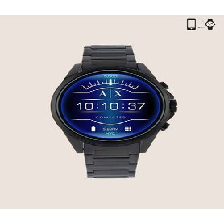

In [25]:
img=image.load_img('Datasets/test/watch/00000000.jpg',target_size=(224,224))
img


In [26]:
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [27]:
x.shape

(224, 224, 3)

In [28]:
x=x/255

In [29]:
import numpy as np
img_data=np.expand_dims(x,axis=0)
#img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
model.predict(img_data)

array([[1.2860771e-03, 1.5957128e-04, 6.4367600e-06, 9.9854785e-01]],
      dtype=float32)

In [31]:
a=np.argmax(model.predict(img_data), axis=1)

In [32]:
a==1

array([False])

#### Advantages
VGG brought with it a massive improvement in accuracy and an improvement in speed as well. 

This was primarily because of improving the depth of the model and also introducing pretrained models.

The increase in the number of layers with smaller kernels saw an increase in non-linearity which is always a positive in deep learning.

VGG brought with it various architectures built on the similar concept. This gives more options to us as to which architecture could best fit our application.

#### Disadvantages
One major disadvantage that I found was that this model experiences the vanishing gradient problem.

If we look at my validation loss graph, we clearly see it increasing as a trend. This wasn’t the case with any of the other models. 

The vanishing gradient problem was solved with the ResNet architecture.

VGG is slower than the newer ResNet architecture that introduced the concept of residual learning which was another major breakthrough.